# Task 1: Choose a classification dataset and normalize features

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("Iris.csv")

# Drop Id column if it exists
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

print(df.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# Features and target
X = df.drop(columns=['Species'])
y = df['Species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



We are using the Iris dataset, which contains measurements of iris flowers from three species: Setosa, Versicolor, and Virginica.

Features:

Sepal Length (cm)

Sepal Width (cm)

Petal Length (cm)

Petal Width (cm)

Target:

Species (Setosa, Versicolor, Virginica)

Since KNN is a distance-based algorithm, feature scaling is important.
We normalize features using StandardScaler:

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Task 2: Use KNeighborsClassifier

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

# Task 3: Experiment with different values of K

In [6]:
from sklearn.metrics import accuracy_score

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(f"K={k}, Accuracy={acc:.3f}")


K=1, Accuracy=0.967
K=2, Accuracy=0.933
K=3, Accuracy=1.000
K=4, Accuracy=1.000
K=5, Accuracy=1.000
K=6, Accuracy=0.967
K=7, Accuracy=0.967
K=8, Accuracy=0.967
K=9, Accuracy=1.000
K=10, Accuracy=1.000
K=11, Accuracy=0.967
K=12, Accuracy=0.967
K=13, Accuracy=0.967
K=14, Accuracy=0.967
K=15, Accuracy=0.967


**Observations:**

The model achieves perfect accuracy for several values of K (3, 4, 5, 9, 10), indicating the dataset is well-separated and easy to classify.

Very small K values (like 1) can lead to slightly lower accuracy due to overfitting to noise.

Larger K values stabilize accuracy but may slightly reduce precision on edge cases.

Conclusion:

For this dataset, K=3, 4, or 5 provides optimal performance without compromising generalization.

# Task 4: Evaluate model using accuracy and confusion matrix

Accuracy: 0.9666666666666667


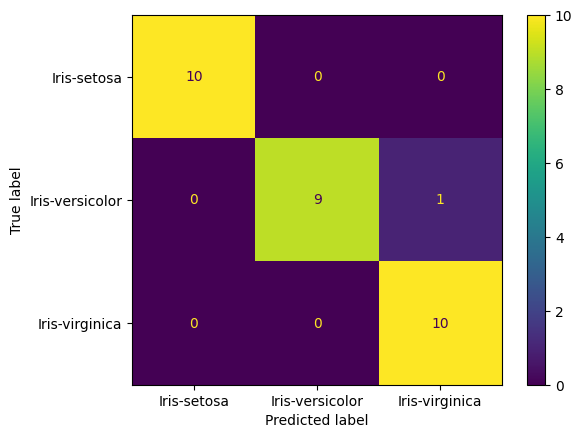

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
ConfusionMatrixDisplay(cm, display_labels=knn.classes_).plot()


# Task 5: Visualize decision boundaries

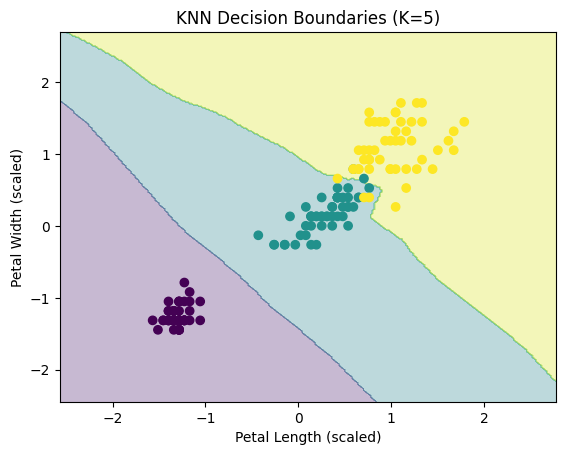

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Select only 2 features for 2D visualization
X_vis = X_scaled[:, 2:4]

# Fit KNN with best K
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_vis, y)

# Create meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict over meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([np.where(knn.classes_ == label)[0][0] for label in Z])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=[np.where(knn.classes_ == label)[0][0] for label in y])
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title("KNN Decision Boundaries (K=5)")
plt.show()
